## Лабораторная робата №2

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("C:/Users/вячеслав/Desktop/Lect_04/")

In [3]:
df = pd.read_csv("Econom_Cities_data.csv", delimiter = ';', decimal = ',', index_col='City')

In [4]:
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [5]:
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

Заметим, что Джакарта и Каир имееют странные показатели в 1-м и 3-м столбце, которые существенно отличаются от остальных, следовательно это выбросы и перед тем как построить дендограмму удалим их.  

In [6]:
#Процесс удаления
df = df.drop('Jakarta')
df = df.drop('Cairo')

In [7]:
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8    50.0
Manila          2268   40.0     4.0
Mexico_City     1944   49.8 

Заметим, что нам надо провести стандартизацию данных. 

In [8]:
#Стандартизируем данные 
from sklearn import preprocessing
standart = preprocessing.StandardScaler()
standart.fit(df)
df_s = standart.transform(df)
df_s = pd.DataFrame(df_s, index = df.index, columns = df.columns)
df_s.head()

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351


Чтобы определить число кластеров, рассмотрим каменистую осыпь.

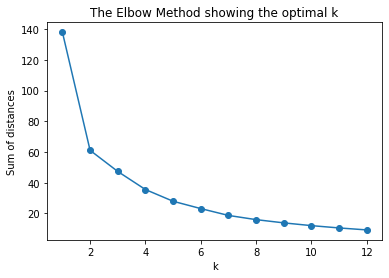

In [9]:
from sklearn.cluster import KMeans
K = range(1, 13)
models = [KMeans(n_clusters=k, random_state=42).fit(df_s) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Посмотрев на каменистую осыпь, возьмем в качестве числа кластеров k = 8.Чтобы разбить наши исходные данные на кластеры будем пользоваться методом k - means.

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8, random_state=42, max_iter=300, n_init=10, verbose=0 )

In [10]:
#model.fit(df_s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [11]:
df_s['cluster'] = model.labels_

In [19]:
#model.cluster_centers_

In [20]:
df_s.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,-0.857780,0.379842,0.574532
1,0.626820,-0.648264,-1.019892
2,-0.470061,-0.905544,-0.830288
3,-0.022693,1.585095,1.901177
4,0.643251,0.337187,0.644053
5,2.871116,-0.297796,-0.479667
6,1.528018,-1.414296,-1.251501
7,-1.130343,2.049909,0.692378


In [21]:
#df_s.groupby('cluster').size()

In [22]:
#model.labels_

In [23]:
df_s['cluster'].sort_values()

City
Amsterdam         0
Sydney            0
Paris             0
Montreal          0
Milan             0
Madrid            0
Vienna            0
London            0
Frankfurt         0
Dusseldorf        0
Luxembourg        0
Copenhagen        0
Dublin            0
Brussels          0
Tel_Aviv          1
Singpore          1
Mexico_City       1
Buenos_Aires      1
Caracas           1
Nairobi           1
Johannesburg      1
Lagos             2
Athens            2
Seoul             2
San_Paulo         2
Nicosia           2
Rio_de_Janeiro    2
Lisbon            2
Zurich            3
Tokyo             3
Geneva            3
Toronto           4
Taipei            4
Chicago           4
New_York          4
Houston           4
Los_Angeles       4
Hong_Kong         5
Bombay            6
Manila            6
Kuala_Lumpur      6
Bogota            6
Panama            6
Oslo              7
Helsinki          7
Stockholm         7
Name: cluster, dtype: int32

Опишем получившиеся кластеры:
- 0) Города с уровнем жизни выше среднего
- 1) Города с низкой зарплатой и средней или чуть выше средней стоймостью на жилье, скорее всего это города с высоким социальным неравенством 
- 2) Города зависимых капиталистических стран с уровнем жизни около среднего
- 3) Города Швейцарии + Токио, т.е. города с достаточно высоким уровнем жизни
- 4) Города развитых капиталистических стран, с достаточно большим уровнем безработицы, судя по большому числу часов работы и средней зарплаты 
- 5) Города с среднем уровнем жизни, с высоким числом часов работы и с зарплатами ниже среднего, скорее всего в этих городах нередки протесты
- 6) Города с дешевой рабочей силой и с низким уровнем жизни, скорее всего это города, в которых расположено много предприятий крупных компаний развитых капиталистических стран, использующих дешевый труд
- 7) Города Скандинавских стран 

Заметим, что разбиение на кластеры получилось очень похожим на разбиение с помощью иерархического анализа, за исключением некоторых моментов, а именно:
- Тайбэй отделился от кластера с Гонконг и добавился в кластер с городами Северной Америки 
- Токио отделился от кластера с Скандинавскими городами и добавился в кластер с городами Швейцари